# Tarea 1 Machine Learning: Olivetti Faces
Autor: Alvaro Neira

Se omiten los acentos y ñ por compatibilidad

In [1]:
import numpy as np
import pandas as pd
import sklearn.decomposition  # Módulo donde encontramos el análisis de componentes principales
import sklearn.manifold  # Módulo donde encontramos el método t-Distributed Stochastic Neighbor Embedding
import matplotlib.pyplot as plt
import sklearn.datasets
import sklearn.svm  # Support vector machines
import sklearn.metrics
import sklearn.gaussian_process  # Kernel de transformación del espacio
import sklearn.preprocessing
import scipy
import sklearn.model_selection  # Validación cruzada
import sklearn.linear_model
import sklearn.tree
import sklearn.neural_network  # Perceptrón multicapa
import sklearn.dummy
import scipy.stats  # Prueba estadística

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score



Se utiliza el conjunto de datos *Olivetti Faces*. 
Este conjunto de datos corresponde a 400 imagenes de 64x64 pixeles en blanco y negro.
Estas imagenes corresponden a los rostros de 40 individuos (10 imagenes por cada individuo).
Se obtiene este conjunto de datos y se agrega una columna extra al final llamada **subject**. Esta columna indica un identificador del individuo (de 0 a 39).

In [2]:
olivetti_faces = pd.read_csv("olivetti_faces.csv")
olivetti_faces.head()

0         1         2         3         4         5         6  \
0  0.309917  0.367769  0.417355  0.442149  0.528926  0.607438  0.657025   
1  0.454545  0.471074  0.512397  0.557851  0.595041  0.640496  0.681818   
2  0.318182  0.400826  0.491736  0.528926  0.586777  0.657025  0.681818   
3  0.198347  0.194215  0.194215  0.194215  0.190083  0.190083  0.243802   
4  0.500000  0.545455  0.582645  0.623967  0.648760  0.690083  0.694215   

          7         8         9  ...      4087      4088      4089      4090  \
0  0.677686  0.690083  0.685950  ...  0.669422  0.652893  0.661157  0.475207   
1  0.702479  0.710744  0.702479  ...  0.157025  0.136364  0.148760  0.152893   
2  0.685950  0.702479  0.698347  ...  0.132231  0.181818  0.136364  0.128099   
3  0.404959  0.483471  0.516529  ...  0.636364  0.657025  0.685950  0.727273   
4  0.714876  0.723140  0.731405  ...  0.161157  0.177686  0.173554  0.177686   

       4091      4092      4093      4094      4095  subject  
0  0.132231  0.148760  0.152893  0.161157  0.157025        0  
1  0.152893  0.152893  0.152893  0.152893  0.152893        0  
2  0.148760  0.144628  0.140496  0.148760  0.152893        0  
3  0.743802  0.764463  0.752066  0.752066  0.739669        0  
4  0.177686  0.177686  0.177686  0.173554  0.173554        0  

[5 rows x 4097 columns]

El conjunto de datos contiene 400 imágenes y 4097 atributos (64x64 pixeles + etiqueta)

In [3]:
olivetti_faces.shape #En colab, a veces arrojaba menos de 400 filas, por lo cual era necesario recargar para que funcionara lo siguiente

(400, 4097)

Esta parte se basa en el notebook **7-dimensionality_reduction.ipynb**:

Así se ve el conjunto de datos:
(puede ser necesario esperar un minuto que cargue)

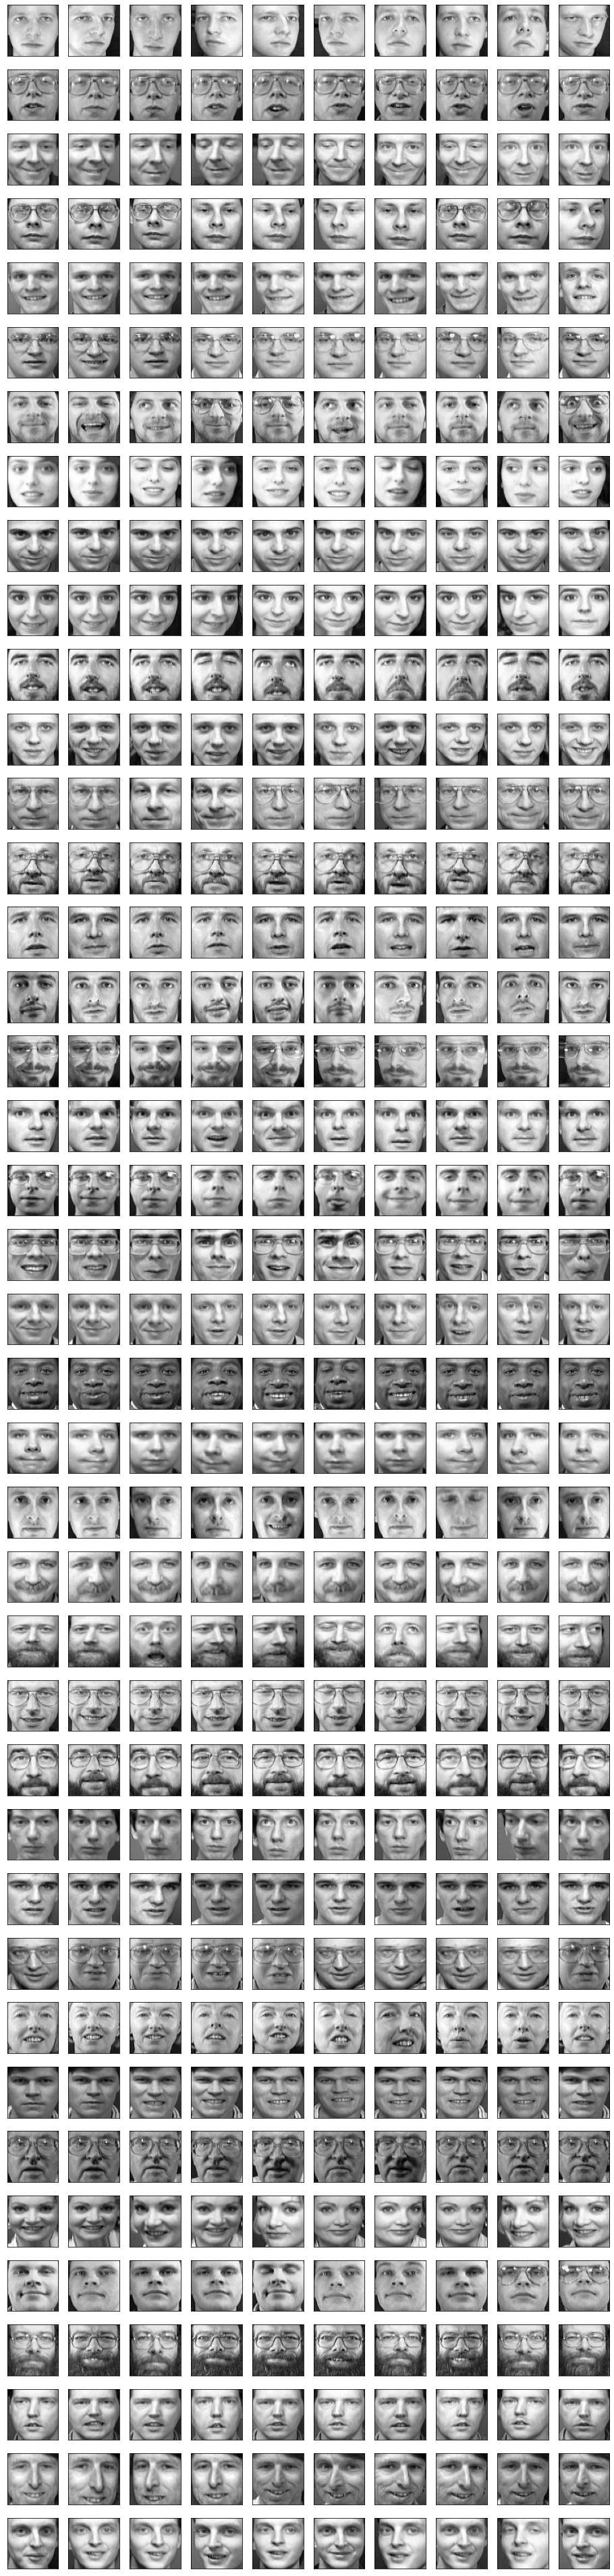

In [4]:
fig,axs = plt.subplots(40,10,figsize=(16, 70),subplot_kw={'xticks':[], 'yticks':[]})
for i,ax in enumerate(axs.flat):
    ax.imshow(
         olivetti_faces.iloc[i,:-1].values.reshape(64,-1),
         cmap="gray"
    )
    
    

## **Hipotesis:**

**Tomar una imagen 64x64 y predecir a cual de los 40 individuos pertenece**

## Metodo No Supervisado: PCA

In [5]:
pca_olivetti = sklearn.decomposition.PCA()
pca_olivetti.fit(olivetti_faces.iloc[:,:-1])

PCA()

Obtenemos una matriz con 400 componentes.

In [6]:
pca_olivetti.components_.shape

(400, 4096)

Así se ve el primer componente.

In [7]:
pca_olivetti.components_[0]

array([-0.0041911 , -0.0071095 , -0.00933609, ...,  0.00018516,
        0.00337965,  0.00318826])

Visualizacion de cada componente en orden descendente de relevancia. A estas imagenes se les conoce como *eigenfaces*.
(puede ser necesario esperar un minuto que cargue)

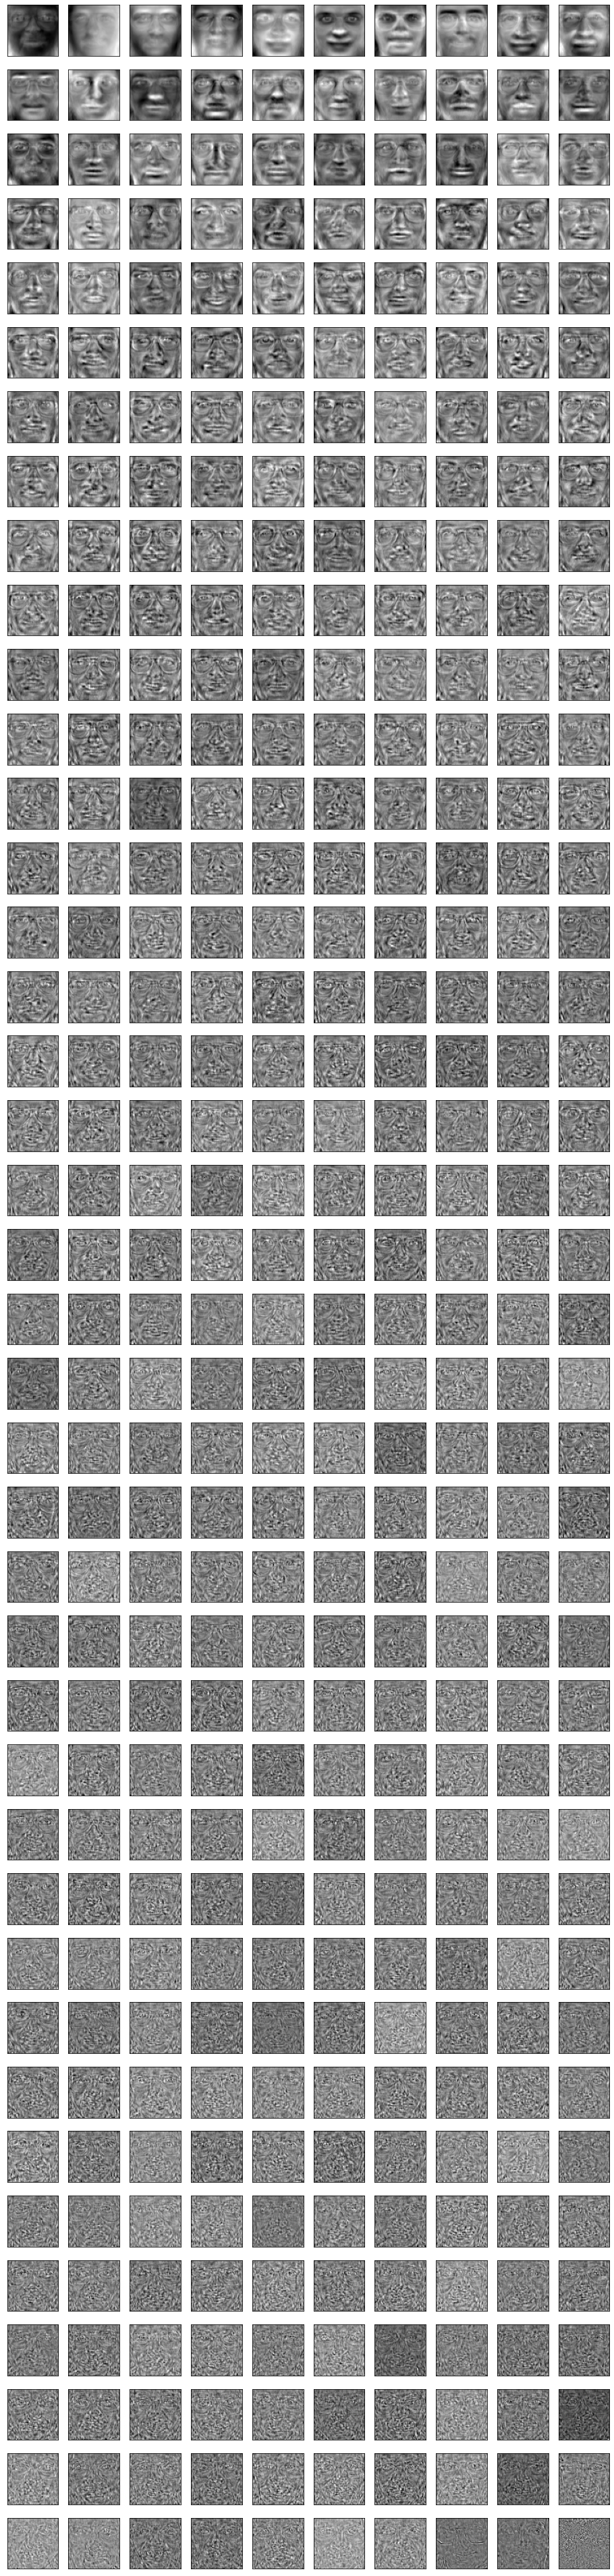

In [8]:
fig,axs = plt.subplots(40,10,figsize=(16, 70),subplot_kw={'xticks':[], 'yticks':[]})
for i,ax in enumerate(axs.flat):
    ax.imshow(
         pca_olivetti.components_[i].reshape(64,-1),
         cmap="gray"
    )

Acá podemos ver cuánta varianza explica cada uno de los 400 componentes.

In [9]:
pca_olivetti.explained_variance_ratio_

array([2.38127293e-01, 1.39939710e-01, 7.96861366e-02, 4.99833131e-02,
       3.60984798e-02, 3.15693930e-02, 2.42683231e-02, 2.03639767e-02,
       1.95811412e-02, 1.67212183e-02, 1.59522174e-02, 1.43697886e-02,
       1.24674107e-02, 1.14713318e-02, 1.06287736e-02, 9.77720334e-03,
       9.19060283e-03, 8.15573265e-03, 7.53874527e-03, 7.46984791e-03,
       6.98577778e-03, 6.14628185e-03, 5.83927715e-03, 5.69722520e-03,
       5.46190783e-03, 5.31855322e-03, 5.13816222e-03, 4.95841288e-03,
       4.57664069e-03, 4.41183411e-03, 4.02001710e-03, 3.84189834e-03,
       3.61950972e-03, 3.34542390e-03, 3.20380733e-03, 3.16040882e-03,
       3.05147325e-03, 2.98634742e-03, 2.82141008e-03, 2.74006498e-03,
       2.59771982e-03, 2.53990363e-03, 2.44547104e-03, 2.39839587e-03,
       2.30890404e-03, 2.26419089e-03, 2.22286388e-03, 2.20442949e-03,
       2.08920885e-03, 2.04983076e-03, 1.96842975e-03, 1.91435943e-03,
       1.85046049e-03, 1.78938964e-03, 1.77608168e-03, 1.72482704e-03,
      

Visualizamos la suma acumulada de las varianzas explicadas por cada componente.

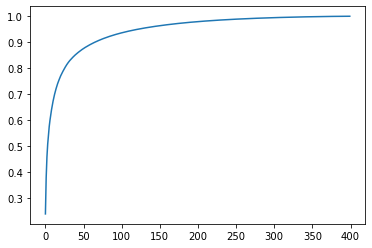

In [10]:
plt.plot(
    range(len(pca_olivetti.explained_variance_ratio_)),
    np.cumsum(pca_olivetti.explained_variance_ratio_)
)

Ajustemos un PCA de solo 2 componentes para visualizar el conjunto de datos en un grafico de dispersion.

In [11]:
pca_olivetti_2d = sklearn.decomposition.PCA(2)
olivetti_2d=pca_olivetti_2d.fit_transform(olivetti_faces.iloc[:,:-1])
olivetti_2d.shape

(400, 2)

Cada uno de los individuos tienden a acumularse juntos

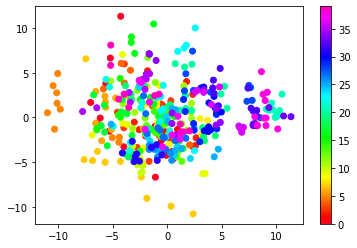

In [12]:
plt.scatter(
    olivetti_2d[:,0],
    olivetti_2d[:,1],
    c=olivetti_faces.subject,
    cmap='gist_rainbow'
)
plt.colorbar()

Asi se ve utilizando solo 2 componentes principales:

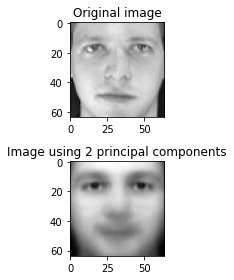

In [13]:
fig, axs = plt.subplots(2)

axs[0].imshow(
    olivetti_faces.iloc[0,:-1].values.reshape(64,-1),
    cmap="gray"
)
axs[0].set_title("Original image")

axs[1].imshow(
    pca_olivetti_2d.inverse_transform(olivetti_2d)[0].reshape(64,-1),
    cmap="gray"
)
axs[1].set_title("Image using 2 principal components")
fig.tight_layout()

No funciona tan bien con solo 2 PC's. Entonces calculamos cuantas componentes principales para obtener 95% de precision. Se obtiene que este numero es 123 de 400.

In [14]:
pca_95p = sklearn.decomposition.PCA(0.95)
olivetti_95p = pca_95p.fit_transform(olivetti_faces.iloc[:,:-1])

In [15]:
pca_95p.components_.shape

(123, 4096)

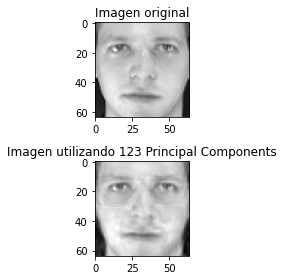

In [16]:
fig, axs = plt.subplots(2)

axs[0].imshow(
    olivetti_faces.iloc[0,:-1].values.reshape(64,-1),
    cmap="gray"
)
axs[0].set_title("Imagen original")

axs[1].imshow(
    pca_95p.inverse_transform(olivetti_95p)[0].reshape(64,-1),
    cmap="gray"
)
axs[1].set_title("Imagen utilizando 123 Principal Components")
fig.tight_layout()

## Metodo Supervisado: Support Vector Machines

Utilizamos 30% de los datos (120 imagenes) para test

In [17]:
(X_train, X_test, y_train, y_test) = sklearn.model_selection.train_test_split(olivetti_faces.iloc[:,:-1].to_numpy(),olivetti_faces.iloc[:,-1:].to_numpy(),test_size=0.3)


In [18]:
svm_linear = sklearn.svm.SVC(kernel="linear")
svm_linear.fit(X_train, np.ravel(y_train,order='C'))


SVC(kernel='linear')

Funcion basada en la referencia: 
https://davidcerezal.github.io/estudio-olivetti-faces/:

In [48]:
def show_result(model, x_train, y_train, y_train_pred, y_test, y_test_pred):
    print('Resultados en el conjunto de entrenamiento')
    print(' Accuracy:', accuracy_score(y_train, y_train_pred))
    print(' Precision:', precision_score(y_train, y_train_pred, average = 'macro'))
    print(' Recall:', recall_score(y_train, y_train_pred, average = 'macro'))
    print('')
    print(' Resultados en el conjunto de test')
    print(' Accuracy:', accuracy_score(y_test, y_test_pred))
    print(' Precision:', precision_score(y_test, y_test_pred,  average = 'macro'))
    print(' Recall:', recall_score(y_test, y_test_pred, average = 'macro'))

In [49]:
y_pred_trains = svm_linear.predict(X_train)
y_pred_test = svm_linear.predict(X_test)
show_result(svm_linear, X_train, y_train, y_pred_trains, y_test, y_pred_test)


Resultados en el conjunto de entrenamiento
 Accuracy: 1.0
 Precision: 1.0
 Recall: 1.0

 Resultados en el conjunto de test
 Accuracy: 0.9166666666666666
 Precision: 0.9377192982456138
 Recall: 0.9127192982456139


## Metodo Supervisado: Regresion Logistica

In [50]:
# Lento, ~23 minutos en Colab
lr=LogisticRegression(solver='lbfgs', max_iter=10000)
lr.fit(X_train, np.ravel(y_train,order='C'))

y_pred_trains = lr.predict(X_train)
y_pred_test = lr.predict(X_test)
show_result(lr, X_train, y_train, y_pred_trains, y_test, y_pred_test)

Resultados en el conjunto de entrenamiento
 Accuracy: 1.0
 Precision: 1.0
 Recall: 1.0

 Resultados en el conjunto de test
 Accuracy: 0.95
 Precision: 0.9587719298245613
 Recall: 0.9473684210526315


## Cross Validation


Funcion copiada del notebook 5.2-cross-validation.ipynb **cross_val_store**():

In [51]:
def cross_val_score(**kwargs):
    """
    Recibe los argumentos para pasárselos a la función sklearn.model_selection.cross_validate
    Retorna una lista con los valores de AUCROC de cada una de las divisiones.
    """
    cv = sklearn.model_selection.cross_validate( # Esta función entrena un modelo para distintos subconjuntos generados al azar.
        # scoring = 'roc_auc', # Usamos la medida de AUCROC para medir el rendimiento de los modelos
        cv = sklearn.model_selection.StratifiedKFold( # La división se realiza de manera estratificada
            n_splits = 10, # Creamos 10 subconjuntos
            shuffle = True, # Desordenamos los datos antes de dividirlos
        ),
        n_jobs = None, # Usamos sólo 1 worker para el entrenmiento
        **kwargs # Pasamos los argumentos recibidos por la función
    )
    return cv["test_score"]

In [52]:
lr_scores = cross_val_score(
    estimator = lr,
    X = olivetti_faces.iloc[:,:-1],
    y = olivetti_faces['subject']
)

In [53]:
svm_scores = cross_val_score(
    estimator = svm_linear,
    X = olivetti_faces.iloc[:,:-1],
    y = olivetti_faces['subject']
)


Ademas se incluye un clasificador "dummy" y un clasificador por arbol de decision para comparar:

In [54]:
dummy_scores = cross_val_score(
    estimator = sklearn.dummy.DummyClassifier(strategy="uniform"),
    X = olivetti_faces.iloc[:,:-1],
    y = olivetti_faces['subject']
)

In [55]:
tree_scores = cross_val_score(
    estimator = sklearn.tree.DecisionTreeClassifier(),
    X = olivetti_faces.iloc[:,:-1],
    y = olivetti_faces['subject']
)

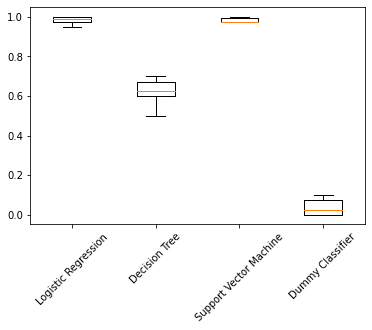

In [56]:
scores = [ # Guardamos todos los resultados en una lista
    lr_scores,
    tree_scores,
    svm_scores,
    dummy_scores
]
names = [
    "Logistic Regression",
    "Decision Tree",
    "Support Vector Machine",
    "Dummy Classifier"
]
plt.boxplot(
    scores,
    labels = names
)
plt.xticks(rotation=45)
plt.show()

In [57]:
dict(
    zip(
        names,
        map(
            np.mean,
            scores
        )
    )
)

{'Logistic Regression': 0.9824999999999999,
 'Decision Tree': 0.62,
 'Support Vector Machine': 0.9824999999999999,
 'Dummy Classifier': 0.0375}

## Conclusion

* Utilizando PCA, con 123 componentes (de 400) se logran reconstruir imagenes con accuracy de 95%
* De los algoritmos probados para predecir a que persona pertenece la foto. Regresion Logistica y SVM funcionan bastante bien, con un accuracy de 95% y 91.66% respectivamente.